In [66]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
#Nos permite leer un archivo CSV especificando la ruta en cuestion
df_nombres = pd.read_csv('C:/users/tavog/nombres.csv')

In [68]:
#Descripe algunos parametros del dataframe, como por ejemplo> cantidad de elementos, media, desviacion estandar, valores maximos 
df_nombres.describe()

,year,quantity
count,5.933561e+06,5.933561e+06
mean,1.974491e+03,5.193854e+01
std,3.032410e+01,1.774408e+02
min,1.910000e+03,5.000000e+00
25%,1.951000e+03,7.000000e+00
50%,1.979000e+03,1.300000e+01
75%,2.001000e+03,3.300000e+01
max,2.017000e+03,1.002000e+04


In [70]:
#Nos retorna la los primeros 5 registros del DataFrame
df_nombres.head()

,state,sex,year,name,quantity
0,MO,F,1910,Mary,611
1,MO,F,1910,Helen,313
2,MO,F,1910,Dorothy,270
3,MO,F,1910,Mildred,267
4,MO,F,1910,Ruth,237


<Axes: >

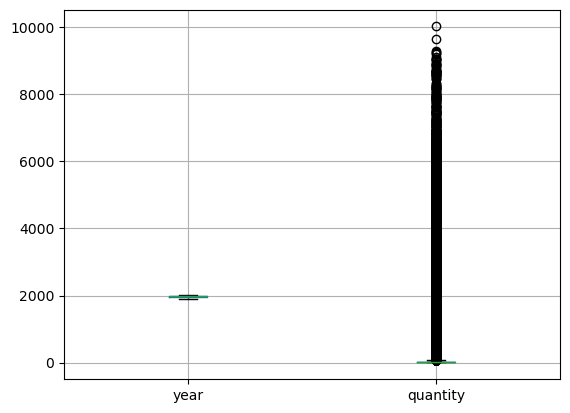

In [26]:
df_nombres.boxplot()

In [ ]:
#Solo nos retorna la media del dataFrame
#df_nombres.mean()

In [ ]:
#df_nombres.median()

In [72]:
#Retorna la cantidad de filas y columnas (x,y)
df_nombres.shape

(5933561, 5)

In [74]:
#la funcion iloc[] retoorna todas las filas(:) y columna especificada (4)
df_nombres.iloc[:,4]

0          611
1          313
2          270
3          267
4          237
          ... 
5933556      5
5933557      5
5933558      5
5933559      5
5933560      5
Name: quantity, Length: 5933561, dtype: int64

In [76]:
#la funcion iloc[] retoorna todas las filas(0:4) y columna especificada (2)
df_nombres.iloc[0:4,2]

0    1910
1    1910
2    1910
3    1910
Name: year, dtype: int64

In [78]:
#otra forma de rotornar columans pero haciendo uso del operador loc, retonando una columna
df_nombres.loc[:,'sex',]

0          F
1          F
2          F
3          F
4          F
          ..
5933556    M
5933557    M
5933558    M
5933559    M
5933560    M
Name: sex, Length: 5933561, dtype: object

In [80]:
#Seleccionando filas espeecificas y columanas con el operador loc.
df_nombres.loc[0:4,['year', 'quantity']]

,year,quantity
0,1910,611
1,1910,313
2,1910,270
3,1910,267
4,1910,237


In [82]:
#Uso de condiciones para filtrar datos del dataframe
#Al tener multiples condiciones deberemos seperar las mismas por ()
df_nombres[(df_nombres['name']=='Gustavo') & (df_nombres['sex']== 'F') & (df_nombres['quantity'] > 4)]

,state,sex,year,name,quantity
1144413,CA,F,1983,Gustavo,6
1163316,CA,F,1989,Gustavo,5
1169821,CA,F,1991,Gustavo,8
1174509,CA,F,1992,Gustavo,5
1189118,CA,F,1996,Gustavo,5


In [84]:
#Creacion dde dataframe que contenta solo registros con Gustavo y que sean masculinos
df_gustavo = df_nombres[(df_nombres['name']=='Gustavo') & (df_nombres['sex']== 'M')]

In [86]:
#Creacion dde dataframe que contenta solo registros con con los estados y cantindades de cada uno de estos
df_estados = df_gustavo[['state','quantity']]
df_estados

,state,quantity
123511,MO,6
126879,MO,9
128087,MO,5
130833,MO,5
131733,MO,5
...,...,...
5927554,KS,8
5928915,KS,6
5930254,KS,5
5932201,KS,5


In [110]:
#Creacion de datafrace donde ya hacemos uso de la funcion groupBy
#df_cantidadxestado = df_estados.groupby('state')['quantity'].agg('sum')
df_cantidadxestado = df_estados.groupby('state').agg('sum')
df_cantidadxestado

,quantity
state,
AL,63
AR,75
AZ,1311
CA,14253
CO,453
CT,34
DC,16
DE,10
FL,1638


In [96]:
 #Creacion de dataFracme donde encontramos la media de personas que se llamen gustavo y seran hombres
df_promedioxestado = df_estados.groupby('state').agg('mean')
df_promedioxestado

,quantity
state,
AL,7.000000
AR,6.818182
AZ,19.863636
CA,151.627660
CO,14.612903
CT,5.666667
DC,5.333333
DE,5.000000
FL,30.333333


In [98]:
#Creamos un nuevo dataFrame con los datos desendiente, si se quierea ascendete unicamente se debera cambiar el "False" por un True
df_promedioxestado.sort_values('quantity', ascending = False)

,quantity
state,
CA,151.627660
TX,78.650943
IL,33.254237
FL,30.333333
NY,25.265625
AZ,19.863636
GA,17.846154
NC,17.760000
CO,14.612903


In [114]:
#Obtener los 10 primeros estados que tiene mas personas 
df_cantidadxestado.sort_values('quantity' , ascending = False).head(10)

,quantity
state,
CA,14253
TX,8337
IL,1962
FL,1638
NY,1617
AZ,1311
NJ,660
GA,464
CO,453
